# Double Server Problem: 
******************************************

### A computer technical support center is staffed by two people, Able and Baker, who take calls and try to answer questions and solve computer problems. Baker is more experienced and can provide service faster than Able. If both are busy, the call goes on hold. 


### 1. Simulate the system for 60 minutes. 
### 2. Draw a histogram to show the frequency of caller delay. 
### 3. Calculate the time percentage for Able's busy time to the total time. 
### 4. Calculate the average waiting (queuing) time of the customers who wait.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the Dataframe
d= ['Customer Number', 'IAT Random Numbers', 'IAT', 'Clock', 'ST Random Numbers', 'Baker Begins', 'Baker ST', 'Baker Ends' ,'Able Begins' ,'Able ST' ,'Able Ends', 'Queuing Time' ,'Time in System' ,'Baker - Idle Time' ,'Able - Idle Time' ]
df=pd.DataFrame(columns=d)
df[d]=[0][0]

In [10]:
def simulation(clock,iat_rn,st_rn,iat_st,iat_prob,baker_st,baker_prob,able_st,able_prob):

# Filling RN & Clock
    df['IAT Random Numbers']=iat_rn
    df['ST Random Numbers']=st_rn
    df['Clock']=clock
    for i in range(len(iat_rn)):
        df.loc[df.index[i], 'Customer Number'] = i+1
    df.fillna(0,inplace=True) 
        
# Creating IAT Cprobability list   
    iat_cprob=[]
    iat_cprob.append(iat_prob[0])
    for i in range(len(iat_prob)-1):
        iat_cprob.append(round(iat_cprob[i]+iat_prob[i+1],2))
# Filling "IAT" column based on IAT_RN
    for i in range(len(iat_rn)):
        for j in range(len(iat_cprob)):
            if iat_rn[i]<iat_cprob[j]*100:
                df.loc[df.index[i], 'IAT'] = iat_st[j]
                break
      
    
# Creating Baker Cprobability list    
    baker_cprob=[]
    baker_cprob.append(baker_prob[0])
    for i in range(len(baker_prob)-1):
        baker_cprob.append(round(baker_cprob[i]+baker_prob[i+1],2))
# Creating Able Cprobability list        
    able_cprob=[]
    able_cprob.append(able_prob[0])
    for i in range(len(able_prob)-1):
        able_cprob.append(round(able_cprob[i]+able_prob[i+1],2))

        
# Filling the Dataframe
    for k in range(len(iat_rn)):
        
        # 1) If Baker is available 
        if df.loc[df.index[k], 'Clock']>=max((df['Baker Ends'])):
            # Spot RN range
            for j in range(len(baker_cprob)):
                if st_rn[k]<baker_cprob[j]*100:
                    df.loc[df.index[k], 'Baker ST'] = baker_st[j]
                    break
            df.loc[df.index[k], 'Baker Begins']=df.loc[df.index[k], 'Clock']
            df.loc[df.index[k], 'Baker - Idle Time']=df.loc[df.index[k], 'Baker Begins']-max(df['Baker Ends'])
            df.loc[df.index[k], 'Baker Ends']=df.loc[df.index[k], 'Baker ST']+df.loc[df.index[k], 'Baker Begins']
        
        # 2) If Baker is busy & Able is available
        elif df.loc[df.index[k], 'Clock']>=max((df['Able Ends'])):
            
            for j in range(len(able_cprob)):
                if st_rn[k]<able_cprob[j]*100:
                    df.loc[df.index[k], 'Able ST'] = able_st[j]
                    break
            
            df.loc[df.index[k], 'Able Begins']=df.loc[df.index[k], 'Clock']
            df.loc[df.index[k], 'Able - Idle Time']=df.loc[df.index[k], 'Able Begins']-max(df['Able Ends'])
            df.loc[df.index[k], 'Able Ends']=df.loc[df.index[k], 'Able ST']+df.loc[df.index[k], 'Able Begins']
        
        # 3) If 2 are busy & Baker finishes first    
        elif min(max(df['Baker Ends']),max(df['Able Ends']))==max(df['Baker Ends']):
            for j in range(len(baker_cprob)):
                if st_rn[k]<baker_cprob[j]*100:
                    df.loc[df.index[k], 'Baker ST'] = baker_st[j]
                    break
            df.loc[df.index[k], 'Baker Begins']=max(df['Baker Ends'])
            df.loc[df.index[k], 'Baker - Idle Time']=df.loc[df.index[k], 'Baker Begins']-max(df['Baker Ends'])
            df.loc[df.index[k], 'Baker Ends']=df.loc[df.index[k], 'Baker ST']+df.loc[df.index[k], 'Baker Begins']
        
        # 4) If 2 are busy & Able finishes first
        else:
            for j in range(len(able_cprob)):
                if st_rn[k]<able_cprob[j]*100:
                    df.loc[df.index[k], 'Able ST'] = able_st[j]
                    break
            df.loc[df.index[k], 'Able Begins']=max(df['Able Ends'])
            df.loc[df.index[k], 'Able - Idle Time']=df.loc[df.index[k], 'Able Begins']-max(df['Able Ends'])
            df.loc[df.index[k], 'Able Ends']=df.loc[df.index[k], 'Able ST']+df.loc[df.index[k], 'Able Begins']
            
    # Calculating Queuing Time    
    for i in range(len(iat_rn)):
        df.loc[df.index[i], 'Queuing Time']=max(df.loc[df.index[i], 'Baker Begins'],df.loc[df.index[i], 'Able Begins'])-df.loc[df.index[i], 'Clock']
    # Calculating Time in System
    for i in range(len(iat_rn)):
        df.loc[df.index[i], 'Time in System']=max(df.loc[df.index[i], 'Baker Ends'],df.loc[df.index[i], 'Able Ends'])-df.loc[df.index[i], 'Clock']
    

In [11]:
# Input sample
iat_rn=[0,26,98,90,26,42,74,80,68,22,48,34,45,24,34,63,38,80,42,56,89,18,51,71,16,92]
st_rn=[95,21,51,92,89,38,13,61,50,49,39,53,88,1,81,53,81,64,1,67,1,47,75,57,87,47]
iat_st=[1,2,3,4]
iat_prob=[0.25,0.4,0.2,0.15]
baker_st=[2,3,4,5]
baker_prob=[0.35,0.25,0.2,0.2]
able_st=[2,3,4,5]
able_prob=[0.3,0.25,0.28,0.17]
clock=[0,2,5,6,7,10,12,16,20,22,25,28,31,33,35,36,37,38,39,40,41,49,50,52,56,59]

## 1. Simulate the system for 60 minutes. 

In [12]:
simulation(clock,iat_rn,st_rn,iat_st,iat_prob,baker_st,baker_prob,able_st,able_prob)

In [13]:
df

,Customer Number,IAT Random Numbers,IAT,Clock,ST Random Numbers,Baker Begins,Baker ST,Baker Ends,Able Begins,Able ST,Able Ends,Queuing Time,Time in System,Baker - Idle Time,Able - Idle Time
0,1.0,0,1.0,0,95,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,2.0,26,2.0,2,21,0.0,0.0,0.0,2.0,2.0,4.0,0.0,2.0,0.0,2.0
2,3.0,98,4.0,5,51,5.0,3.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,4.0,90,4.0,6,92,0.0,0.0,0.0,6.0,5.0,11.0,0.0,5.0,0.0,2.0
4,5.0,26,2.0,7,89,8.0,5.0,13.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0
5,6.0,42,2.0,10,38,0.0,0.0,0.0,11.0,3.0,14.0,1.0,4.0,0.0,0.0
6,7.0,74,3.0,12,13,13.0,2.0,15.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
7,8.0,80,3.0,16,61,16.0,4.0,20.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
8,9.0,68,3.0,20,50,20.0,3.0,23.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
9,10.0,22,1.0,22,49,0.0,0.0,0.0,22.0,3.0,25.0,0.0,3.0,0.0,8.0


In [26]:
df.to_excel(r"C:\Users\DELL\OneDrive - Alexandria University\Simulation task 1.xlsx")

## 2. Draw a histogram to show the frequency of caller delay. 

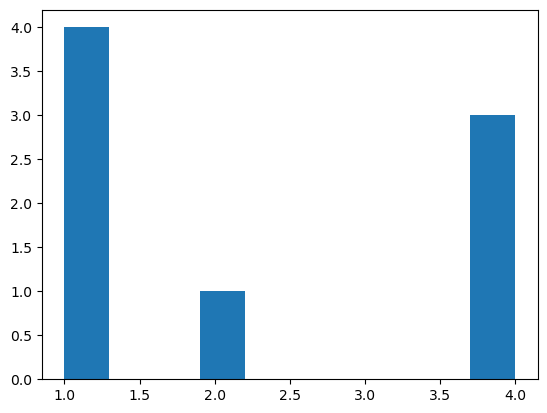

In [14]:
plt.hist(df['Queuing Time'][df['Queuing Time']>0]);

## 3. Calculate the time percentage for Able's busy time to the total time. 

In [21]:
percentage_of_baker_busy=round(sum(df['Baker ST'])/max(max(df['Able Ends']),max(df['Baker Ends'])),3)
percentage_of_able_busy=round(sum(df['Able ST'])/max(max(df['Able Ends']),max(df['Baker Ends'])),3)
print("Percentage of Baker busy =",percentage_of_baker_busy,"\nPercentage of Able busy =",percentage_of_able_busy)

Percentage of Baker busy = 0.903 
Percentage of Able busy = 0.548


## 4. Calculate the average waiting (queuing) time of the customers who wait.

In [24]:
avg_waiting_time=round(sum(df['Queuing Time'])/len(df['Queuing Time']),3)
print("Average Waiting Time =",avg_waiting_time)

Average Waiting Time = 0.692
